# Figure 1e

This notebook recreates figure 1e in the reference article for both the real and noise cells.

## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import numpy as np
import scanpy as sc

from scipy import sparse

from signals_in_the_noise.preprocessing.gse161529 import GSE161529

In [25]:
# -- dataset --
gse = GSE161529()

# -- constants --
random_kwargs = {'use_rep': 'X_pca', 'random_state': 43}

2025-07-12 21:53:15,354 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-12 21:53:15,442 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-12 21:53:15,568 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-12 21:53:15,627 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-12 21:53:15,766 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [32]:
def get_combined_dataset(is_noise):
    adatas = []
    is_noise_val = 1 if is_noise else 0
    for filename in gse.EPI_CELL_TYPING_FILENAMES:
        adata = gse.get_dataset(filename)
        adata.obs_names = [f"{filename}_{i}" for i in range(adata.n_obs)]
        # filter to real cells
        adata = adata[adata.obs['is_noise']==is_noise_val].copy()
        adata = gse.annotate_epithial_cell_typing(adata)
        # remove stromal cells - "...removed the stromal subset..."
        mask = ~adata.obs['predicted_type'].str.lower().str.contains('stromal')
        adata = adata[mask].copy()

        if sparse.issparse(adata.X):
            adata.X = adata.X.toarray()
        adatas.append(adata)
    return ad.concat(adatas, join='inner')

def figure_1_tsne(adata_all, color):
    sc.pp.pca(adata_all, random_state=random_kwargs['random_state'])
    sc.pp.neighbors(adata_all, **random_kwargs)
    # use of leiden and resolution specified in caption for Figure EV1C
    sc.tl.leiden(adata_all, resolution=0.015)
    sc.tl.tsne(adata_all, **random_kwargs)
    sc.pl.tsne(adata_all, color=color)

## 1. Real cells

Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


... storing 'predicted_type' as categorical


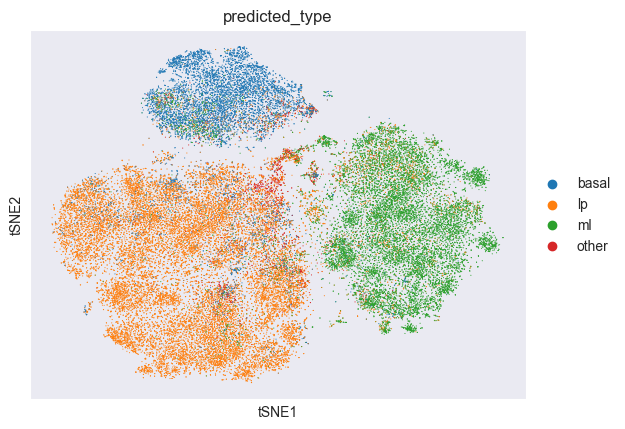

In [33]:
adata_all = get_combined_dataset(is_noise=False)
figure_1_tsne(adata_all, color=['predicted_type'])

Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


... storing 'predicted_type' as categorical


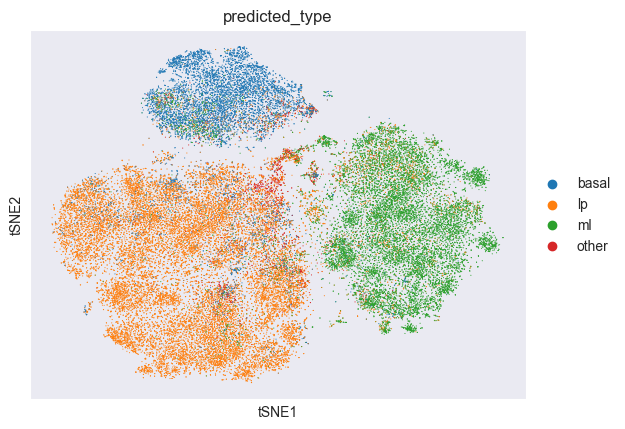

In [31]:
adata_all = get_combined_dataset(is_noise=False)
sc.pp.pca(adata_all, random_state=random_kwargs['random_state'])
sc.pp.neighbors(adata_all, **random_kwargs)
sc.tl.leiden(adata_all, resolution=0.015)
sc.tl.tsne(adata_all, **random_kwargs)
sc.pl.tsne(adata_all, color=['predicted_type'])

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
... storing 'predicted_type' as categorical


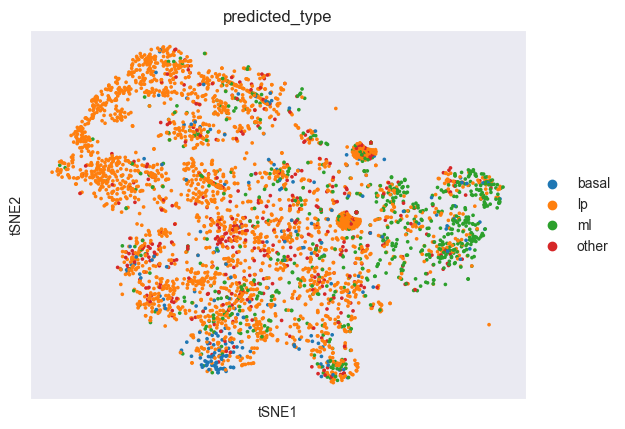

In [16]:
sc.pp.neighbors(adata_all, **random_kwargs)
sc.tl.leiden(adata_all, resolution=0.015)
sc.tl.tsne(adata_all, **random_kwargs)
sc.pl.tsne(adata_all, color=['predicted_type'])

In [17]:
sc.pl.tsne(adata, color=['predicted_type'])

... storing 'predicted_type' as categorical


KeyError: "Could not find 'tsne' or 'X_tsne' in .obsm"

In [ ]:
sc.tl.tsne(adata_all, use_rep='X_pca', **random_kwargs)
sc.pl.tsne(adata_all, color=['score_basal', 'score_lp', 'score_ml', 'predicted_type'])

In [ ]:
sc.tl.leiden(adata, resolution=0.015, random_state=43)
sc.tl.tsne(adata_all, use_rep='X_pca', **random_kwargs)
sc.pl.tsne(adata_all, color=['score_basal', 'score_lp', 'score_ml', 'predicted_type'])

In [ ]:
adata = gse.get_dataset(gse.EPI_CELL_TYPING_FILENAMES[0])

In [ ]:
adata = gse.annotate_epithial_cell_typing(adata)
adata.X = adata.X.toarray()
sc.pp.neighbors(adata, use_rep='X', **random_kwargs)
sc.tl.leiden(adata, resolution=0.015)
sc.tl.tsne(adata, use_rep='X', **random_kwargs)
sc.pl.tsne(adata, color=['score_basal', 'score_lp', 'score_ml', 'score_other', 'predicted_type'])

In [ ]:
adata = adata[adata.obs['is_noise']==0]
adata = gse.annotate_epithial_cell_typing(adata)
sc.pp.neighbors(adata, use_rep='X', random_state=43)
sc.tl.tsne(adata, random_state=43)
sc.pl.tsne(adata, color=['score_basal', 'score_lp', 'score_ml', 'score_other', 'predicted_type'])